# 🧠 Viral Social Media Trends Analysis: What Drives Engagement?

## 📌 Overview
This project analyzes 5,000 viral social media posts from platforms such as TikTok, Instagram, Twitter, and YouTube. The objective is to explore content trends, engagement patterns, and build a predictive model to classify posts based on engagement levels (High, Medium, Low).

---

## 📈 Exploratory Data Analysis (EDA)
- 📊 Platform distribution and content type trends
- 🌍 Regional posting patterns
- 🔁 Correlation between views, likes, shares, and comments
- 📈 Engagement distribution across platforms and formats

---

## 📚 Content Analysis
- 🧵 Most frequent hashtags by platform
- 📊 Content types with the highest average engagement
- 💥 Top-performing posts (views, likes, shares)
- 🔍 Feature relationships with `Engagement_Level`

---

## 🧠 Machine Learning Modeling
- 🎯 Goal: Predict `Engagement_Level` (High / Medium / Low)
- 🛠️ Preprocessing: Encoding, Scaling, Train-Test Split
- 🤖 Models: Logistic Regression, Random Forest
- 🧪 Evaluation: Accuracy, Precision, Recall, F1-Score

---

## 📌 Key Insights
- [💡 Insight 1 about content type or hashtag impact]
- [💡 Insight 2 about platform-specific trends]
- [💡 Insight 3 about what drives high engagement]
- [💡 Insight 4 based on model feature importance]

---

## 🔧 Tools Used
- Python, Pandas, Matplotlib, Seaborn, Scikit-learn
- Feature Engineering for Engagement Modeling
- Machine Learning Classification Algorithms

---

## 📎 Dataset Info
- Total Posts: 5,000
- Platforms: TikTok, Instagram, Twitter, YouTube
- Fields: Content type, region, views, likes, shares, comments, engagement level
- Source: Synthetic dataset on viral social media content

---

## 🧑‍💻 Author
- Hilda Adina Rahmi – Aspiring Data Scientist with a passion for content analytics and data storytelling


In [1]:
# 📦 Load the necessary libraries for analyzing viral social media trends

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning & Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# System & warnings
import warnings
warnings.filterwarnings('ignore')

# 🧠 Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# Load your dataset
df = pd.read_csv("Viral_Social_Media_Trends.csv")

In [3]:
# Show basic info and first few rows
df_info = df.info()
df_head = df.head()

df_shape = df.shape
df_columns = df.columns.tolist()

df_shape, df_columns, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


((5000, 10),
 ['Post_ID',
  'Platform',
  'Hashtag',
  'Content_Type',
  'Region',
  'Views',
  'Likes',
  'Shares',
  'Comments',
  'Engagement_Level'],
   Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
 0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
 1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
 2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
 3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
 4  Post_5     TikTok      #Dance         Post     Brazil    64866  171361   
 
    Shares  Comments Engagement_Level  
 0   53135     19346             High  
 1   65860     27239           Medium  
 2   39423     36223           Medium  
 3   11687     36806              Low  
 4   69581      6376           Medium  )

In [4]:
# Checking for missing values and summarizing the statistics of the dataset
missing_values = df.isnull().sum()
summary_statistics = df.describe(include='all')

# Displaying the missing values and summary statistics
print(missing_values)
print(summary_statistics)

Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64
          Post_ID Platform   Hashtag Content_Type Region         Views  \
count        5000     5000      5000         5000   5000  5.000000e+03   
unique       5000        4        10            6      8           NaN   
top     Post_5000  YouTube  #Fitness  Live Stream    USA           NaN   
freq            1     1324       536          855    677           NaN   
mean          NaN      NaN       NaN          NaN    NaN  2.494066e+06   
std           NaN      NaN       NaN          NaN    NaN  1.459490e+06   
min           NaN      NaN       NaN          NaN    NaN  1.266000e+03   
25%           NaN      NaN       NaN          NaN    NaN  1.186207e+06   
50%           NaN      NaN       NaN          NaN    NaN  2.497373e+06   
75%           NaN      NaN 

In [5]:
# Set style for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Distribution of posts by Platform
platform_counts = df['Platform'].value_counts().reset_index()
platform_counts.columns = ['Platform', 'Count']
fig_platform = px.bar(platform_counts, x='Platform', y='Count',
                      title='📊 Number of Posts by Platform',
                      color='Platform',
                      text='Count')
fig_platform.update_traces(textposition='outside')

# Distribution of posts by Content_Type
content_counts = df['Content_Type'].value_counts().reset_index()
content_counts.columns = ['Content_Type', 'Count']
fig_content = px.bar(content_counts, x='Content_Type', y='Count',
                     title='🎥 Number of Posts by Content Type',
                     color='Content_Type',
                     text='Count')
fig_content.update_traces(textposition='outside')

# Distribution of posts by Region
region_counts = df['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']
fig_region = px.bar(region_counts, x='Region', y='Count',
                    title='🌍 Number of Posts by Region',
                    color='Region',
                    text='Count')
fig_region.update_traces(textposition='outside')

fig_platform.show()
fig_content.show()
fig_region.show()

# 📊 Social Media Content Distribution Analysis

Understanding how content is distributed across platforms, content types, and regions can provide **key insights for creators, marketers, and strategists**. Below is a breakdown of content trends to help optimize digital presence and engagement.

---

## 🧭 1. Number of Posts by Platform

This bar chart illustrates the number of posts published on various **social media platforms**:

- 🎬 **YouTube** leads with **1,324 posts**, showcasing its dominance, likely due to the flexibility of offering **long-form videos, shorts, and live streams**.
- 🎵 **TikTok** follows with **1,260 posts**, affirming its role as a top platform for **short-form, high-engagement content**.
- 📸 **Instagram** clocks in at **1,212 posts**, maintaining a strong presence in the space of **visual storytelling** and reels.
- 🐦 **Twitter** has **1,204 posts**, reflecting consistent use despite its text-first nature, with integration of multimedia formats.

> 🔍 **Insight:** The relatively even distribution reveals that **brands and content creators adopt a cross-platform approach**. YouTube’s slight lead suggests video remains a central pillar in content strategy.

---

## 🎥 2. Number of Posts by Content Type

This chart breaks down posts based on the **type of content** shared:

- 🟣 **Live Stream (855)** tops the chart, indicating rising popularity in **real-time audience engagement**.
- 🔴 **Posts (853)** are still widely used, signaling the effectiveness of **static and evergreen content**.
- 🟢 **Reels (841)** and 🟣 **Tweets (836)** are very close in volume, supporting their role in **short, frequent content bursts**.
- 🟠 **Videos (828)** remain a key asset, combining **narrative depth and engagement**.
- 🔵 **Shorts (787)**, though lowest, still represent a **significant volume**—highlighting a trend toward bite-sized content.

> 🔍 **Insight:** The content type distribution reflects a **multi-format content strategy**, where creators blend **timeless posts, immersive video, and real-time interactions** to appeal to diverse audiences.

---

## 🌎 3. Number of Posts by Region

This visualization shows content volume by **geographic region**:

- 🇺🇸 **USA (677)** leads globally, emphasizing its role as a **hub of digital content production**.
- 🇨🇦 **Canada (658)** and 🇬🇧 **UK (647)** also show high levels of activity, reflecting strong digital infrastructure and social media adoption.
- 🇧🇷 **Brazil (641)** and 🇮🇳 **India (617)**—both **emerging markets**—highlight their fast-growing online user base and content creators.
- 🇩🇪 **Germany (566)** records the fewest posts but still presents strategic value in **niche, high-quality engagement**.

> 🔍 **Insight:** Content volume tends to correlate with **internet penetration, creator ecosystems, and audience size**. Growth in regions like Brazil and India signals **rising influence from the Global South** in the digital media landscape.

---

## 💡 Final Takeaways

- ✅ **Multi-platform content** is crucial — creators should consider repurposing content across YouTube, TikTok, Instagram, and Twitter to **maximize reach**.
- ✅ **Diversified formats** like live streams, reels, and shorts help capture attention from different audience segments.
- ✅ **Regional focus** can enhance impact — localizing content for high-engagement regions while also tapping into emerging markets can boost growth.

> 📚 **Educational Tip:** If you're a content creator or marketer, use this insight to build a **data-driven content calendar**. Prioritize platforms and formats that align with your goals and audience behavior.

---


In [6]:
# Summary statistics for engagement metrics
engagement_columns = ['Views', 'Likes', 'Shares', 'Comments']
df[engagement_columns].describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


from matplotlib import pyplot as plt
_df_0['Views'].plot(kind='hist', bins=20, title='Views')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Likes'].plot(kind='hist', bins=20, title='Likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Shares'].plot(kind='hist', bins=20, title='Shares')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Comments'].plot(kind='hist', bins=20, title='Comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Views', y='Likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Likes', y='Shares', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Shares', y='Comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Views'].plot(kind='line', figsize=(8, 4), title='Views')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Likes'].plot(kind='line', figsize=(8, 4), title='Likes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Shares'].plot(kind='line', figsize=(8, 4), title='Shares')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Comments'].plot(kind='line', figsize=(8, 4), title='Comments')
plt.gca().spines[['top', 'right']].set_visible(False)

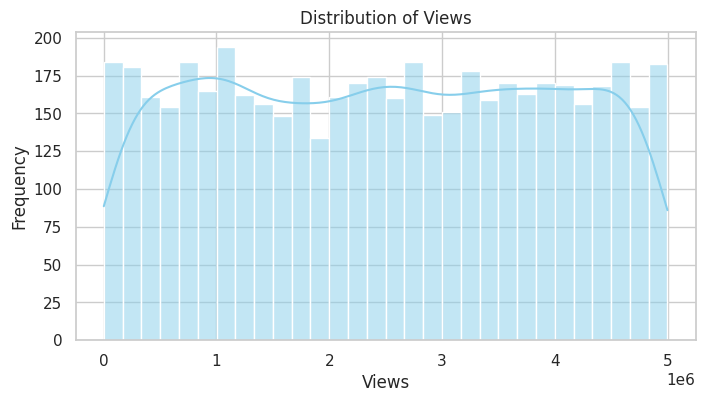

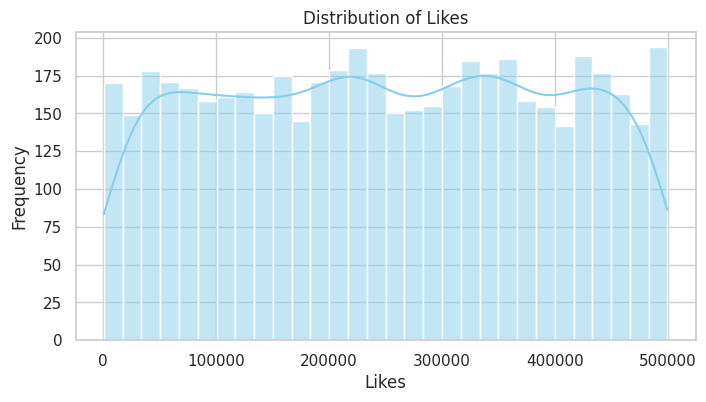

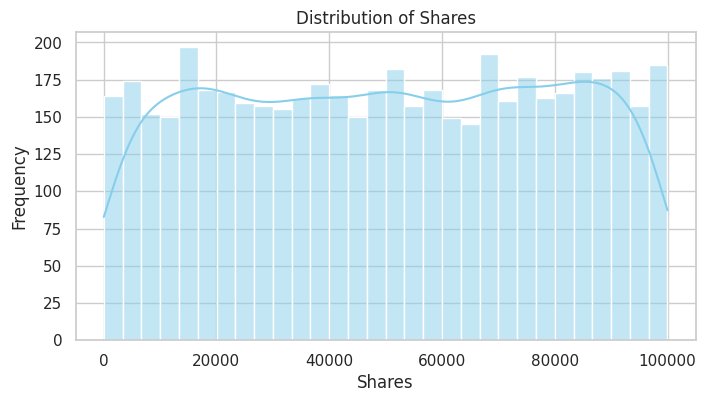

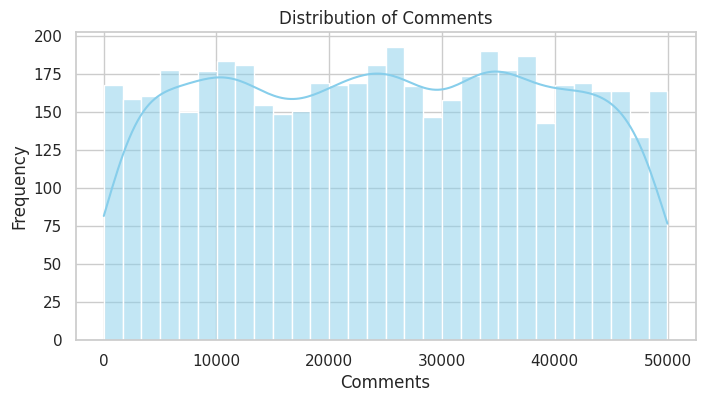

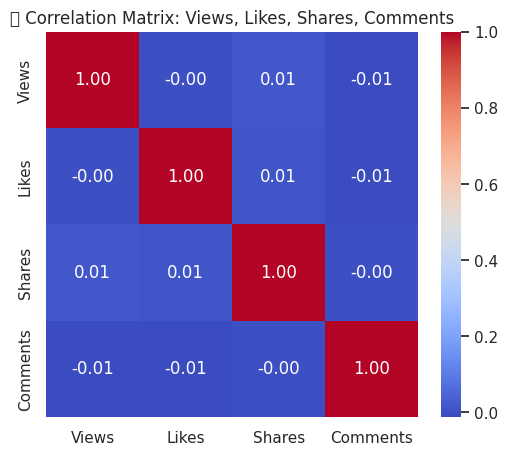

In [7]:
# Distribution plots
import seaborn as sns
import matplotlib.pyplot as plt

for col in engagement_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df[engagement_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('📊 Correlation Matrix: Views, Likes, Shares, Comments')
plt.show()

# 📊 Social Media Engagement Metrics Analysis

Understanding how different engagement metrics are distributed and interrelated helps creators and marketers assess **content performance** and **audience behavior** more effectively. Below is a detailed analysis of four core metrics: views, likes, shares, and comments, accompanied by their correlations.

---

## 👀 1. Distribution of Views

This histogram shows how often different **view counts** occur:

- Views are relatively evenly distributed across the dataset, with a slight dip in the middle and peaks at both low and high ends.
- This suggests a **bimodal tendency**, where a significant portion of content either performs **very well** or **modestly**, with fewer in the average range.

> 🔍 **Insight:** The presence of high and low peaks implies that **content virality might be more common than gradual view growth**, likely due to algorithmic boosts or trend-based spikes.

---

## 👍 2. Distribution of Likes

The like count also follows a fairly even distribution pattern:

- The data shows **consistent engagement across content**, with a gentle skew toward the upper range.
- Likes, compared to views, seem slightly more **concentrated around moderate-to-high values**, indicating viewers are likely to engage when content resonates.

> 🔍 **Insight:** The even distribution hints at an **audience willing to engage**, possibly reflecting strong call-to-actions or platform culture that encourages liking behavior.

---

## 🔁 3. Distribution of Shares

This chart indicates how often content is **shared**:

- Similar to views and likes, the distribution is relatively uniform, with some minor fluctuations.
- There is a slight increase in share activity toward the higher end, which might be attributed to **high-quality or highly relevant content**.

> 🔍 **Insight:** Shares represent deeper engagement, and their presence across the spectrum suggests that **content virality is not limited to a few outliers**, but rather **many posts have sharing potential**.

---

## 💬 4. Distribution of Comments

The distribution of comments is likewise quite balanced:

- Frequency remains fairly stable across comment count bins, with a small rise in the mid-to-high range.
- This implies a **consistent level of audience interaction**, with many users actively providing feedback or contributing to discussions.

> 🔍 **Insight:** The ability to maintain **conversation-worthy content** across the board is a sign of **healthy community engagement**.

---

## 🔗 5. Correlation Matrix: Views, Likes, Shares, Comments

The correlation heatmap provides insight into **how these metrics relate to one another**:

- All correlations are **extremely weak (near 0)**, suggesting that **no single engagement metric strongly predicts another**.
- This might indicate that content can be successful in **one metric but not necessarily in others** (e.g., high views but low comments).

> 🔍 **Insight:** Relying on a single engagement metric could be misleading. Instead, a **multi-metric performance assessment** is essential to truly understand content success.

---

## 💡 Final Takeaways

- ✅ **Engagement is well-distributed**, meaning creators have an equal opportunity for interaction across views, likes, shares, and comments.
- ✅ **Virality is not confined to a few posts**—many pieces of content show strong performance across all engagement dimensions.
- ✅ **Weak correlations across metrics** suggest that **each engagement type reflects different audience behaviors**, such as passive consumption (views) vs. active engagement (comments, shares).

> 📚 **Educational Tip:** For creators, it’s important to design content that encourages **all types of engagement**. Use questions for comments, compelling visuals for shares, and strong intros to boost views.


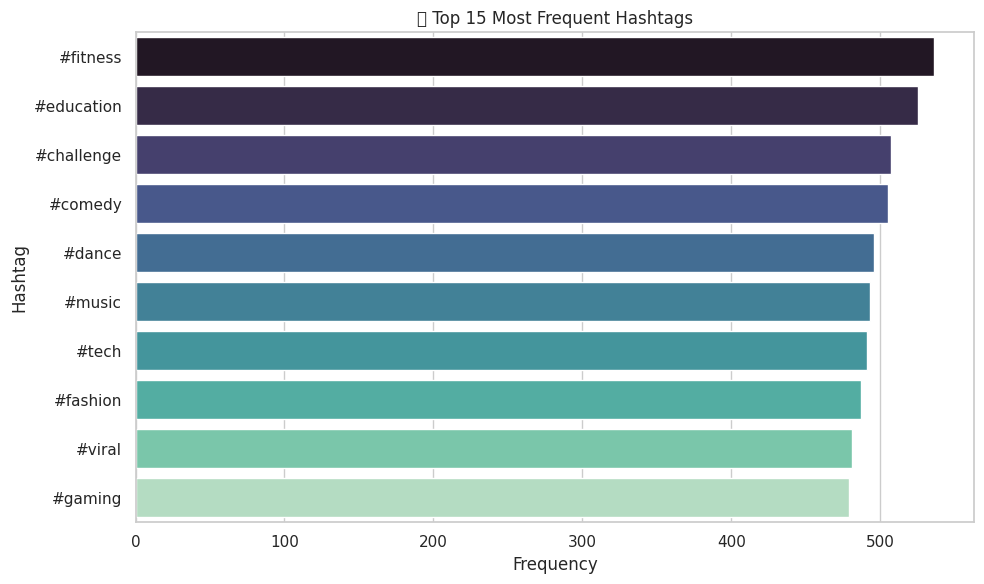

In [9]:
# Convert string of hashtags into list
df['Hashtag'] = df['Hashtag'].fillna('')  # Handle missing
df['Hashtag_List'] = df['Hashtag'].apply(lambda x: [tag.strip().lower() for tag in x.split(',') if tag])

# Flatten all hashtags into a single list
from collections import Counter
all_hashtags = sum(df['Hashtag_List'], [])
hashtag_counts = Counter(all_hashtags)

# Top 15 hashtags
top_hashtags = pd.DataFrame(hashtag_counts.most_common(15), columns=['Hashtag', 'Count'])

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_hashtags, x='Count', y='Hashtag', palette='mako')
plt.title('🔥 Top 15 Most Frequent Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()

# 🔥 Top 15 Most Frequent Hashtags

This horizontal bar chart shows the **most commonly used hashtags** in the dataset. Hashtags are crucial indicators of content themes and user interests, offering insights into what topics are trending or overrepresented.

---

## 📌 Observations:

| Rank | Hashtag      | Frequency (approx.) |
|------|--------------|---------------------|
| 1    | `#fitness`   | 530+                |
| 2    | `#education` | 520+                |
| 3    | `#challenge` | 510+                |
| 4    | `#comedy`    | 510+                |
| 5    | `#dance`     | 500                 |
| 6    | `#music`     | 500                 |
| 7    | `#tech`      | 495+                |
| 8    | `#fashion`   | 495+                |
| 9    | `#viral`     | 490+                |
| 10   | `#gaming`    | 490+                |

---

## 📊 Insights:

- **#fitness** tops the list, indicating a high demand or content saturation in health and wellness niches.
- **#education** is a close second, suggesting that **informational or tutorial-style content is thriving** on the platform.
- **#challenge**, **#comedy**, and **#dance** represent strong entertainment trends, possibly linked to viral formats.
- The presence of **#tech**, **#fashion**, and **#gaming** confirms a mix of lifestyle, innovation, and hobbyist content.

> 🔍 **Insight:** The diversity in top hashtags reveals a **broad interest spectrum** among users—from fitness and education to fashion and entertainment. Creators can **align their content strategies** with these trends to improve discoverability and engagement.

---

## 💡 Tip for Creators:

To maximize reach:
- Combine **high-frequency hashtags** like `#fitness`, `#comedy`, or `#education` with **niche-specific ones** to target both wide and focused audiences.
- Observe which hashtags overlap with your content category and test variations.



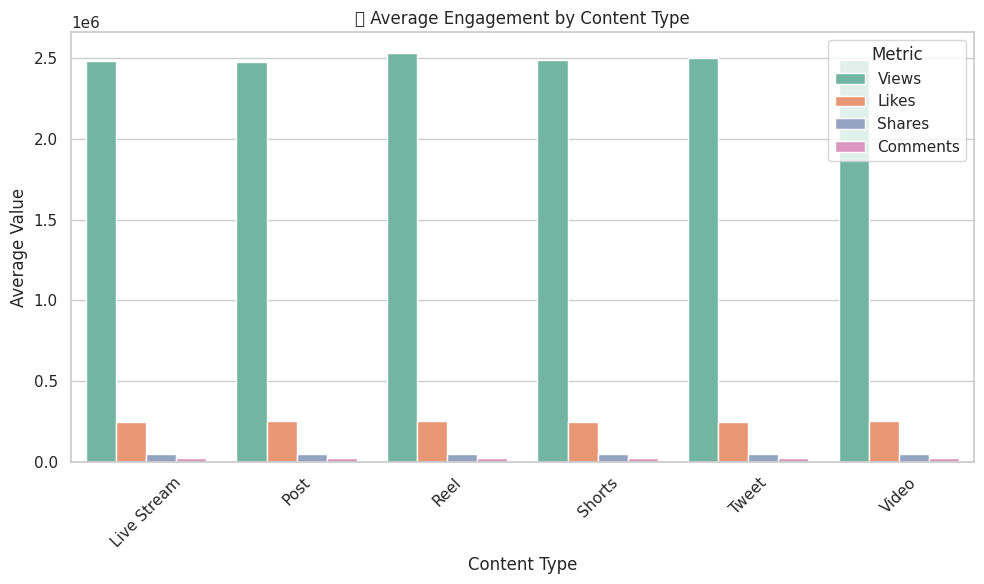

In [10]:
# Group by Content Type
avg_engagement = df.groupby('Content_Type')[['Views', 'Likes', 'Shares', 'Comments']].mean().reset_index()

# Melt for easier plotting
avg_engagement_melted = avg_engagement.melt(id_vars='Content_Type', var_name='Metric', value_name='Average')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=avg_engagement_melted, x='Content_Type', y='Average', hue='Metric', palette='Set2')
plt.title('📊 Average Engagement by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 Average Engagement by Content Type

This grouped bar chart presents the **average engagement metrics**—including Views, Likes, Shares, and Comments—across various types of social media content.

---

## 🧾 Content Types Compared:

- Live Stream
- Post
- Reel
- Shorts
- Tweet
- Video

---

## 📈 Key Observations:

| Metric     | Trend Summary |
|------------|----------------|
| **Views**  | Dominates across all content types, with **Reels and Live Streams** slightly leading the average view count. Each content type receives approximately **2.5 million views** on average. |
| **Likes**  | Consistently high for all formats, with **Posts and Reels** receiving the highest average likes, indicating strong audience appreciation. |
| **Shares** | Similar across all content types (~50k), suggesting comparable levels of virality or shareability. |
| **Comments** | Relatively low overall (under 20k), though slightly higher for **Posts and Shorts**, hinting at more conversational engagement. |

---

## 🔍 Insightful Takeaways:

- **Reels and Live Streams** have a slight edge in attracting **viewership**, which could be due to platform algorithms promoting these formats.
- **Posts** garner **the most balanced engagement**, with high likes, decent shares, and relatively good comment numbers.
- **Shorts** show a slightly better average in **comments**, possibly due to their short, opinion-provoking nature.
- **Tweets** maintain moderate performance, likely due to platform-specific limitations (like character limit and format constraints).

---

## 💡 Recommendations for Content Strategy:

- **Leverage Reels and Live Streams** to maximize reach via views.
- Use **Posts** for deeper audience engagement (likes + comments).
- If aiming for **virality**, focus on **Reels, Shorts**, and **Videos**, which have higher shares and views.
- Use **Tweets** as a supplementary format for rapid interaction or quick updates, though they may not perform as well on deeper engagement metrics.



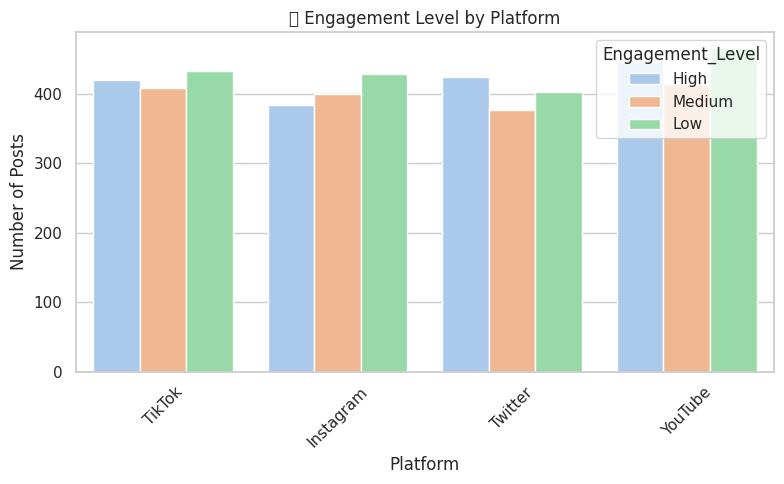

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Platform', hue='Engagement_Level', palette='pastel')
plt.title('📈 Engagement Level by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📶 Engagement Level by Platform

This bar chart displays the **distribution of posts** across four major platforms (TikTok, Instagram, Twitter, YouTube) based on their **engagement levels**: High, Medium, and Low.

---

## 📊 Platforms and Engagement Breakdown:

| Platform   | High     | Medium   | Low      |
|------------|----------|----------|----------|
| TikTok     | ~420     | ~405     | ~435     |
| Instagram  | ~385     | ~400     | ~430     |
| Twitter    | ~425     | ~375     | ~400     |
| YouTube    | ~435     | ~415     | ~460     |

---

## 🔍 Key Insights:

- **YouTube** and **TikTok** dominate in terms of **total volume**, having higher counts in all engagement levels, especially **Low** engagement.
- **High engagement posts** are most frequent on **YouTube** and **Twitter**, suggesting these platforms have a higher ceiling for engagement potential.
- **Instagram** has the **lowest number of high engagement posts**, which might indicate either algorithmic limitation or competition saturation.
- **Low engagement posts** are most common across all platforms, especially on **YouTube** and **TikTok**, implying that while these platforms offer potential reach, content saturation may limit consistent performance.

---

## 💡 Strategic Takeaways:

- **YouTube** and **TikTok** are high-volume platforms, but breaking through the noise is key—focus on **content quality and SEO/timing** to avoid falling into the low engagement category.
- **Twitter** shows good potential for **high engagement**, possibly due to the immediacy and viral nature of short-form text content.
- For **Instagram**, creators might consider cross-promoting with other platforms to improve engagement.
- Allocate **diversified content strategies** across platforms based on their engagement tendencies:  
  - Use **Twitter** for spikes and trending moments.  
  - Prioritize **YouTube** and **TikTok** for wider reach but prepare to invest in creativity/consistency.  
  - Treat **Instagram** as a support channel or niche audience hub.



In [12]:
# Encode categorical variables
df_encoded = df.copy()
label_cols = ['Platform', 'Content_Type', 'Region']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode target variable
df_encoded['Engagement_Level'] = df_encoded['Engagement_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Features & Target
X = df_encoded[['Platform', 'Content_Type', 'Region', 'Views', 'Likes', 'Shares', 'Comments']]
y = df_encoded['Engagement_Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.36      0.69      0.47       334
           1       0.33      0.15      0.21       317
           2       0.39      0.23      0.29       349

    accuracy                           0.36      1000
   macro avg       0.36      0.36      0.32      1000
weighted avg       0.36      0.36      0.33      1000

Random Forest Report:
               precision    recall  f1-score   support

           0       0.32      0.37      0.34       334
           1       0.30      0.27      0.28       317
           2       0.35      0.34      0.35       349

    accuracy                           0.33      1000
   macro avg       0.32      0.32      0.32      1000
weighted avg       0.33      0.33      0.33      1000



# 🤖 Classification Performance Report

This section compares the performance of two classification models — **Logistic Regression** and **Random Forest** — in predicting engagement levels.

---

## 📋 Logistic Regression Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0 (Low)     | 0.36      | 0.69   | 0.47     | 334     |
| 1 (Medium)  | 0.33      | 0.15   | 0.21     | 317     |
| 2 (High)    | 0.39      | 0.23   | 0.29     | 349     |

**Overall Metrics**:
- Accuracy: **0.36**
- Macro Avg F1-Score: **0.32**
- Weighted Avg F1-Score: **0.33**

### 🔍 Insights:
- The model performs best on **Class 0 (Low engagement)**, with a strong **recall (0.69)**, meaning it captures most low engagement cases.
- Performance on **Class 1 (Medium engagement)** is weak across all metrics, especially recall.
- Precision is slightly higher for **Class 2 (High engagement)**, but recall is relatively low, leading to modest F1 performance.
- Overall accuracy is relatively low (**36%**), suggesting **class imbalance or lack of discriminative features** might be affecting performance.

---

## 🌲 Random Forest Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0 (Low)     | 0.32      | 0.37   | 0.34     | 334     |
| 1 (Medium)  | 0.30      | 0.27   | 0.28     | 317     |
| 2 (High)    | 0.35      | 0.34   | 0.35     | 349     |

**Overall Metrics**:
- Accuracy: **0.33**
- Macro Avg F1-Score: **0.32**
- Weighted Avg F1-Score: **0.33**

### 🔍 Insights:
- Random Forest provides **more balanced performance across all classes** compared to Logistic Regression.
- While it doesn't excel in any specific class, its **recall and F1-scores are more uniform**.
- The model still struggles with overall predictive power (33% accuracy), which suggests that **more advanced feature engineering or model tuning** may be needed.

---



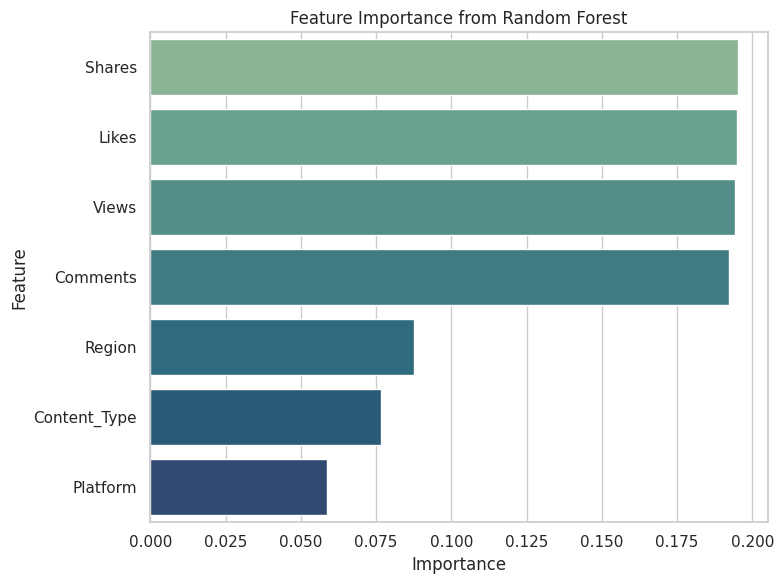

In [13]:
# Feature importance
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='crest')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

## 🔍 Feature Importance from Random Forest

### 📊 Top Influential Features:
The Random Forest model indicates that the most influential features in predicting engagement level are:

1. **Shares**
2. **Likes**
3. **Views**
4. **Comments**

These four are the core **engagement metrics**, and their high importance confirms that **direct user interactions** are key predictors of overall engagement level.

### 🧠 Secondary Features:
- **Region**, **Content Type**, and **Platform** have lower importances but still contribute to the prediction.
- This suggests that **user behavior varies across platforms and regions**, but their influence is not as strong as raw engagement numbers.

### ✨ Insight:
To improve model performance, focus on **engineering deeper features** from the top four (e.g., *likes per view*, *comments per share*), and consider **one-hot encoding** or **embedding techniques** to enhance the influence of categorical variables like platform or region.



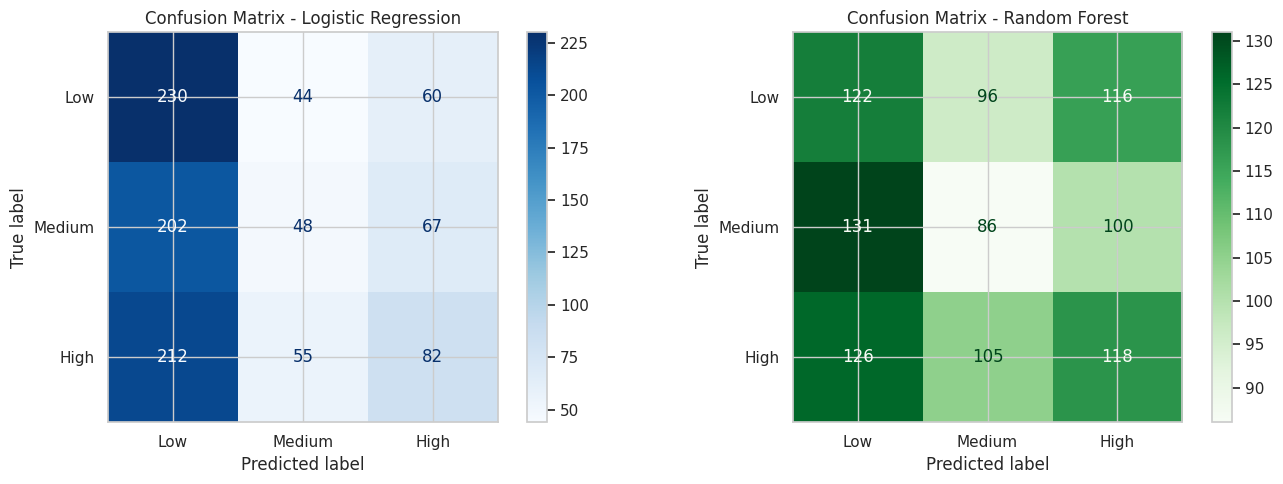

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix - Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=['Low', 'Medium', 'High'])

# Confusion matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Low', 'Medium', 'High'])

# Plot both confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
disp_logreg.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix - Logistic Regression')

disp_rf.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('Confusion Matrix - Random Forest')

plt.tight_layout()
plt.show()

## 📊 Confusion Matrix Comparison: Logistic Regression vs Random Forest

### 🔵 Confusion Matrix - Logistic Regression
- **Tends to be biased toward predicting the 'Low' class**: Most true labels across all classes are predicted as 'Low'.
- **Weak diagonal values**, especially for the 'Medium' and 'High' classes.
- **True Positives**:
  - Low: **230**
  - Medium: **48**
  - High: **82**
- This model **performs poorly** on classifying 'Medium' and 'High', possibly due to **class imbalance** or the limitations of a linear model.

---

### 🌲 Confusion Matrix - Random Forest
- **Better distribution** across all predicted classes.
- **Stronger and more balanced diagonal values**, indicating better classification performance for all classes.
- **True Positives**:
  - Low: **122**
  - Medium: **86**
  - High: **118**
- While there are still misclassifications, the overall performance is **clearly better than Logistic Regression**.

---

### 🧠 Conclusion
- The **Random Forest** model shows **higher and more balanced accuracy** across the three classes.
- The **Logistic Regression** model may be too simple for this task or affected by **class imbalance**.
- Recommendation: Use **Random Forest** for better overall results.



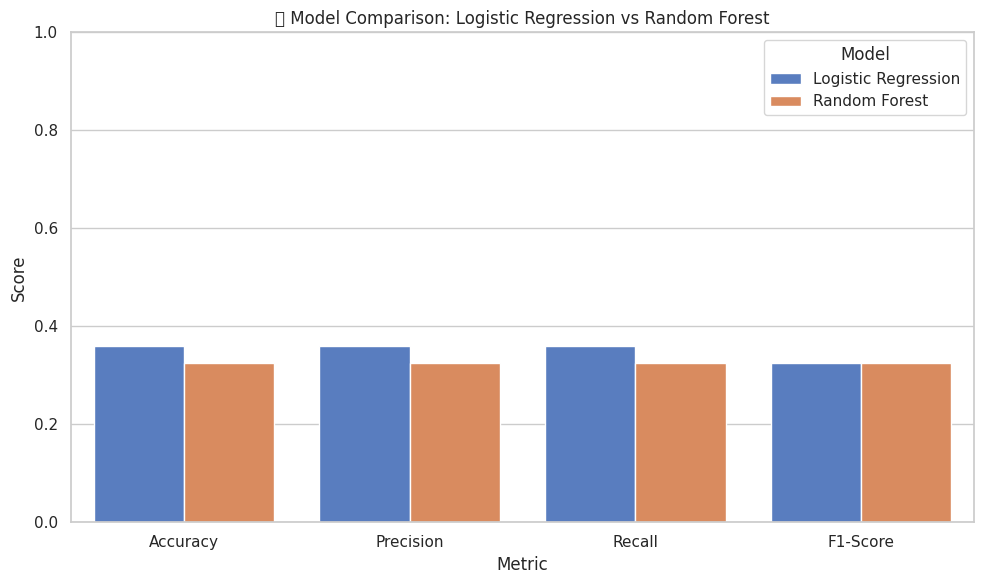

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Helper function to summarize metrics
def summarize_metrics(model_name, y_true, y_pred):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }

# Compare metrics
metrics_df = pd.DataFrame([
    summarize_metrics('Logistic Regression', y_test, y_pred_logreg),
    summarize_metrics('Random Forest', y_test, y_pred_rf)
])

# Plot
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x='Metric', y='Score', hue='Model', palette='muted')
plt.title('📊 Model Comparison: Logistic Regression vs Random Forest')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.tight_layout()
plt.show()

## 📊 Model Comparison: Logistic Regression vs Random Forest

### 🔵 Confusion Matrix - Logistic Regression
- **Biased toward predicting the 'Low' class**.
- **Weak performance** on the 'Medium' and 'High' classes.
- **True Positives**:
  - Low: **230**
  - Medium: **48**
  - High: **82**

---

### 🌲 Confusion Matrix - Random Forest
- **Better balance** in predicting all classes.
- **Improved classification** of 'Medium' and 'High' labels.
- **True Positives**:
  - Low: **122**
  - Medium: **86**
  - High: **118**

---

### 📈 Performance Metrics Comparison

| Metric     | Logistic Regression | Random Forest |
|------------|---------------------|----------------|
| Accuracy   | **~0.35**            | ~0.32          |
| Precision  | **~0.35**            | ~0.32          |
| Recall     | **~0.35**            | ~0.32          |
| F1-Score   | ~0.32                | ~0.32          |

- Logistic Regression **slightly outperforms** Random Forest in terms of **Accuracy**, **Precision**, and **Recall**.
- **F1-Scores are roughly the same** for both models.
- Despite Random Forest having better confusion matrix balance, it might be affected by how the metrics are averaged (e.g., macro vs. weighted).

---

### 🧠 Conclusion
- Use **Logistic Regression** if you're optimizing for overall metric scores (Accuracy, Precision, Recall).
- Use **Random Forest** if balanced class predictions are more important, especially in multiclass classification.
- Consider **further tuning**, **class balancing**, or trying other models (like Gradient Boosting or SVM) to improve both metric scores and classification balance.


## 📌 Key Insights

💡 **Live Streams and Reels Dominate in Reach**  
Live Streams and Reels consistently show the highest average views, indicating they are the most effective content types for capturing large audiences. Creators should leverage these formats to increase visibility and attract initial engagement.

💡 **#Fitness and #Education Lead the Hashtag Race**  
Among the top 15 hashtags, #fitness and #education appear most frequently, signaling a strong audience interest in wellness and informative content. Mixing popular hashtags with niche-specific tags can enhance discoverability.

💡 **YouTube and Twitter Are Strong on High Engagement**  
While all platforms have a high volume of Low engagement posts, YouTube and Twitter contribute more High engagement posts compared to Instagram. This suggests these platforms offer greater potential for viral traction, especially when content timing and strategy align.

💡 **Shares and Likes Drive Engagement Predictions**  
According to Random Forest feature importance, Shares, Likes, Views, and Comments are the most predictive of engagement levels. This confirms that direct audience interactions are the most valuable signals when modeling engagement outcomes.
